# Project: Early Identification of Undiagnosed Diabetic Patients using BRFSS 2015

## 01. Business Understanding

### Objective:
Diabetes often goes undetected until serious complications develop, especially in pre-diabetic individuals. This project aims to apply machine learning techniques to **predict an individual's diabetes status** — whether non-diabetic, pre-diabetic, or diabetic — based on their self-reported health, lifestyle, and demographic information.

Using the **2015 Behavioral Risk Factor Surveillance System (BRFSS)** dataset, we train and evaluate multiple classification models to identify which health indicators (e.g., BMI, blood pressure, physical activity) are most effective for early diabetes risk assessment. The ultimate goal is to build a model that can assist in **early detection**, enabling timely medical attention and preventive care.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [4]:
# Load the dataset
tabular_data_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_df = pd.read_csv(tabular_data_path)

# Data Understanding and Preprocessing

## 03. Dataset Overview

### Dataset Summary

- **Source**: CDC’s Behavioral Risk Factor Surveillance System (BRFSS), 2015 edition  
- **Size**: 253,680 individual survey responses  
- **Features**: 21 variables covering clinical, lifestyle, and demographic indicators  
- **Target Variable**: `Diabetes_012`  
  - 0 → Non-Diabetic  
  - 1 → Pre-Diabetic  
  - 2 → Diabetic  

This is treated as a **multiclass classification problem**. The goal is to train models that can accurately categorize individuals into one of the three diabetes risk groups using their self-reported health and behavioral data.

---

### Feature Descriptions

The features included in the dataset represent a broad snapshot of each respondent’s health status and lifestyle:

- `HighBP`: Diagnosed with high blood pressure  
- `HighChol`: Diagnosed with high cholesterol  
- `CholCheck`: Has had a cholesterol check recently  
- `BMI`: Body Mass Index (numeric)  
- `Smoker`: Smoking status  
- `Stroke`: History of stroke  
- `HeartDisease`: Diagnosed with coronary heart disease or myocardial infarction  
- `PhysActivity`: Participated in physical activity in the last 30 days  
- `Fruits` / `Veggies`: Regular consumption of fruits and vegetables  
- `HvyAlcoho`: Heavy alcohol consumption  
- `AnyHealth`: Self-reported poor health  
- `NoDocbcCost`: Skipped medical care due to cost concerns  
- `GenHlth`: General self-rated health (scale of 1 = Excellent to 5 = Poor)  
- `MentHlth`: Number of days mental health was not good in past 30 days  
- `PhysHlth`: Number of days physical health was not good  
- `DiffWalk`: Difficulty walking or climbing stairs  
- `Sex`: Gender (0 = Female, 1 = Male)  
- `Age`: Age group (1 = 18–24 to 13 = 80+)  
- `Education`: Education level (1 = No school to 6 = College graduate)  
- `Income`: Income range (1 = <$10K to 8 = $75K or more)

These features are used to train and evaluate machine learning models in order to predict a respondent’s diabetes status.


In [7]:
# Explore data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
diabetes_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
# Check for missing values
diabetes_df.isnull().sum() 

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
# Check class distribution for the target variable
diabetes_df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [12]:
# Exclude irrelevant features: Education and Income
X_features = diabetes_df.drop(columns=['Diabetes_012', 'Education', 'Income'])
y_target = diabetes_df['Diabetes_012']

X_features.columns = X_features.columns.astype(str)
print("Dataset after excluding Education and Income:")
X_features.head()

Dataset after excluding Education and Income:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


# Data Visualization

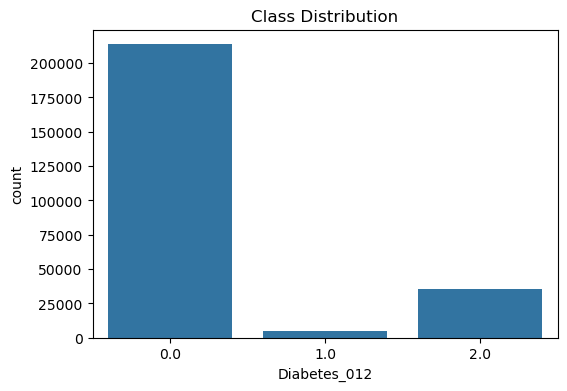

In [14]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=diabetes_df)
plt.title("Class Distribution")
plt.show()

## Class Distribution

1. **Imbalance Observation**  
   The dataset shows a noticeable class imbalance. Most of the entries belong to the *Non-diabetic* category (class `0`), while the *Diabetic* group (class `2`) has far fewer samples. The *Pre-diabetic* class (class `1`) is the smallest, making it the least represented group in the dataset.

2. **Why It Matters**  
   This imbalance can lead to biased predictions, where the model tends to favor the majority class. As a result, it may struggle to correctly identify cases of diabetes or pre-diabetes — which are often the most important to catch early.

3. **What We’ll Do About It**  
   To build a fair and effective model, we’ll need to address this imbalance. Potential strategies include applying oversampling techniques like **SMOTE** or using **class weighting** during training. This ensures the model pays equal attention to all classes, not just the majority.

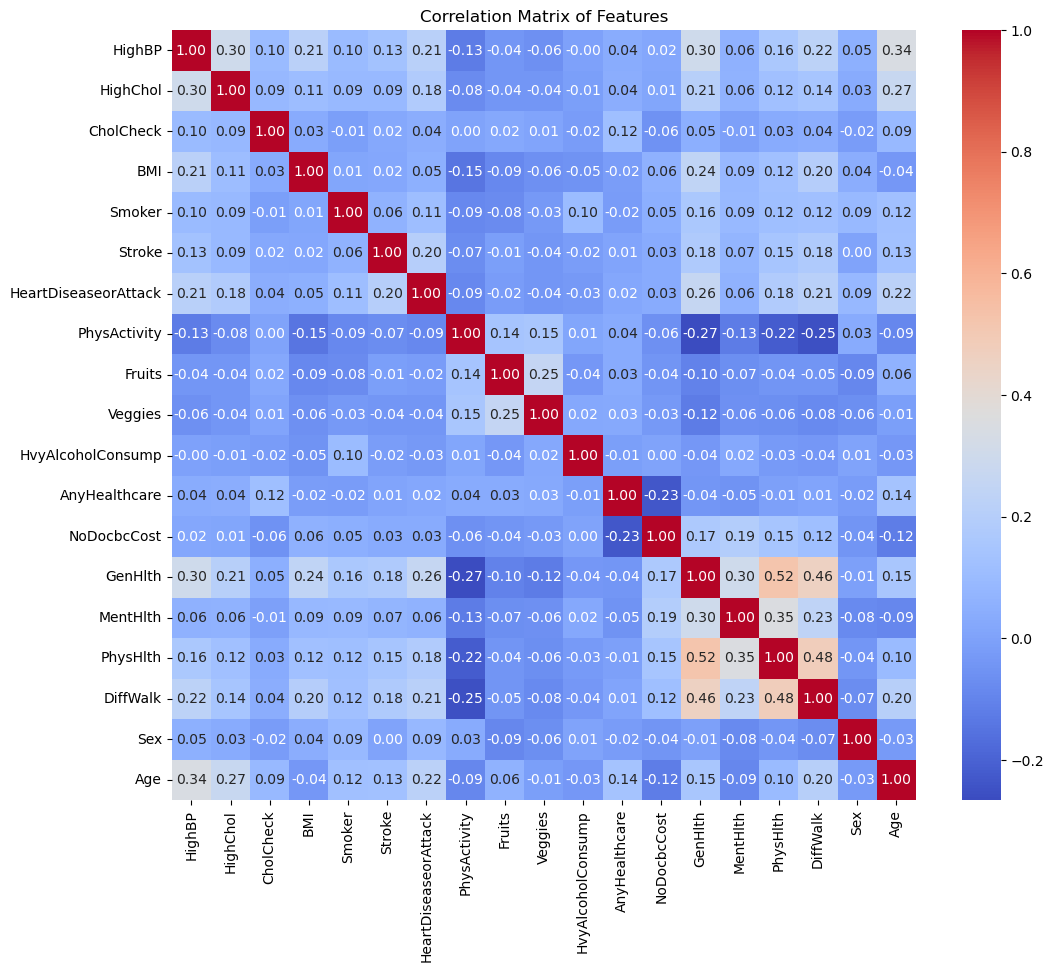

In [16]:
# Visualizing feature correlations
plt.figure(figsize=(12, 10))
correlation_matrix = X_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()


## 🔍 Correlation Heatmap Insights

The heatmap above displays the **Pearson correlation coefficients** among key health indicators and demographic variables. The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation). Here are some noteworthy relationships observed:

1. **HighBP and Age**: A moderately positive correlation (**0.34**) suggests that high blood pressure tends to increase with age.

2. **GenHlth and MentHlth**: A relatively strong positive correlation (**0.52**) indicates that poorer general health is often reported alongside mental health struggles.

3. **GenHlth and PhysHlth**: Also shows a strong correlation (**0.46**), reinforcing that individuals with poor general health often experience poor physical health.

4. **PhysHlth and DiffWalk**: A moderate positive correlation (**0.48**) implies that those who report more days of poor physical health are more likely to have walking difficulties.

5. **MentHlth and PhysHlth**: Moderate correlation (**0.35**) suggests that mental and physical health are interconnected in this population.

6. **PhysActivity and DiffWalk**: Displays a mild **negative correlation (-0.27)**, suggesting that those who are physically active are less likely to report difficulty walking.

7. **Smoker and Age**: A low positive correlation (**0.12**) indicates smoking behavior does not vary strongly with age in this dataset.

8. **HighChol and Age**: A modest positive correlation (**0.27**) shows that high cholesterol is more common among older individuals.

### 📝 Summary:
Most features show **weak to moderate correlations**, which implies that while some health indicators are related (e.g., general health and physical health), many are **independent**, justifying the inclusion of all variables for modeling without multicollinearity concerns.


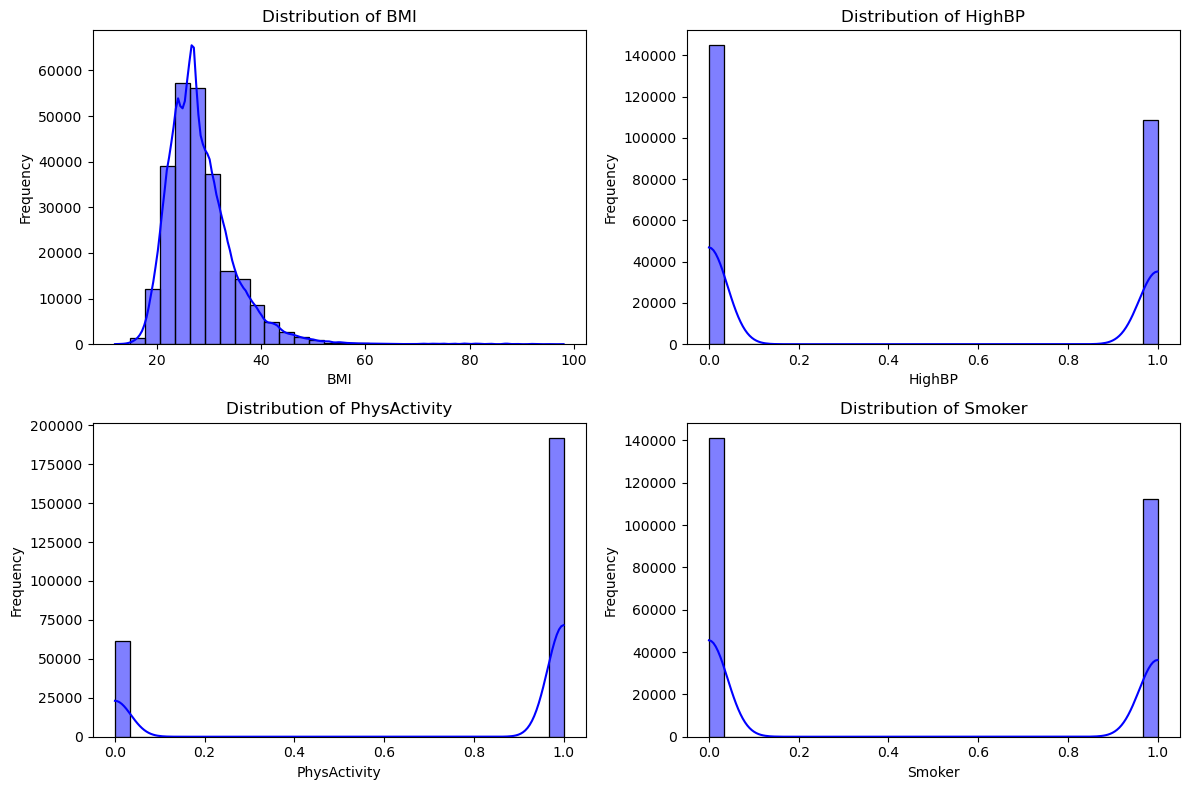

In [18]:
# Plot histograms and KDEs for key numerical features
features = ['BMI', 'HighBP', 'PhysActivity', 'Smoker']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(diabetes_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Feature Distributions (Histograms with KDE)

To better understand the distribution of key numerical and binary variables, histograms with KDE (Kernel Density Estimation) were plotted for **BMI**, **HighBP**, **PhysActivity**, and **Smoker**.

### Key Observations:

1. **BMI (Body Mass Index)**  
   - The distribution is **right-skewed**, with most values concentrated between **20 and 30**, suggesting that a large portion of the population falls within or near a healthy weight range.
   - A smaller group of individuals has notably higher BMI values, extending the right tail.

2. **HighBP (High Blood Pressure)**  
   - The distribution appears **bimodal**, reflecting the binary nature of the variable.
   - A significantly higher density is observed for individuals **without high blood pressure**, indicating it's more common in this dataset.

3. **PhysActivity (Physical Activity)**  
   - The distribution is **uniformly split**, with nearly equal representation of individuals who were physically active and those who were not in the past 30 days.
   - This balance suggests no dominant trend in physical activity levels.

4. **Smoker**  
   - Similar to HighBP, the **bimodal distribution** shows a clear skew toward **non-smokers**, though a meaningful proportion of respondents do identify as smokers.

### Summary:
These distribution plots help uncover potential imbalances and skewed features that may influence model training. For instance, BMI’s right-skewed nature might require normalization or transformation, while the binary features highlight class splits that can impact classification boundaries.


/var/folders/k6/4nfkf4757yz1wx2lg9q79k540000gn/T/ipykernel_71695/2962253501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=feature, data=diabetes_df, palette='Set2')
/var/folders/k6/4nfkf4757yz1wx2lg9q79k540000gn/T/ipykernel_71695/2962253501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=feature, data=diabetes_df, palette='Set2')
/var/folders/k6/4nfkf4757yz1wx2lg9q79k540000gn/T/ipykernel_71695/2962253501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y=feature, data=dia

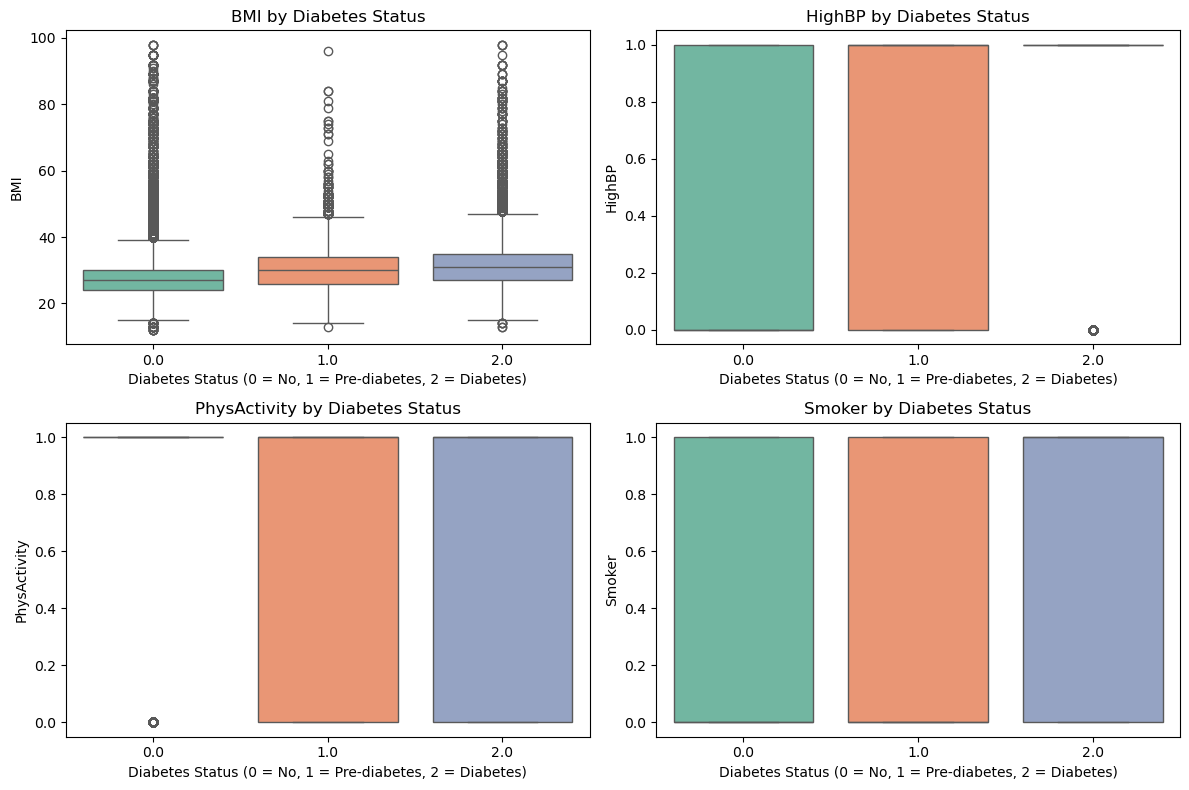

In [20]:
# Boxplots for numerical features by diabetes status
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Diabetes_012', y=feature, data=diabetes_df, palette='Set2')
    plt.title(f'{feature} by Diabetes Status')
    plt.xlabel('Diabetes Status (0 = No, 1 = Pre-diabetes, 2 = Diabetes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## 📦 Boxplot Observations by Diabetes Group

To get a better sense of how certain health factors vary among people with different stages of diabetes, I plotted boxplots for four important features: **BMI**, **High Blood Pressure**, **Physical Activity**, and **Smoking**. These are grouped by diabetes status: 0 (Non-Diabetic), 1 (Pre-Diabetic), and 2 (Diabetic).

### What stood out:

1. **BMI**  
   - People in the diabetic group generally have **higher BMI values**, with their median noticeably above the non-diabetic and pre-diabetic groups.
   - There’s also a wider range of BMI values in this group, which might point to more severe or diverse weight issues among diabetics.

2. **High Blood Pressure**  
   - As we move from non-diabetic to diabetic, there’s a **clear increase in high blood pressure cases**.
   - This trend lines up with what we’d expect — high blood pressure is a known risk factor for diabetes.

3. **Physical Activity**  
   - Diabetics appear to be **less physically active** on average.
   - While the difference isn’t huge, it’s still noticeable and may reflect either mobility limitations or lifestyle habits.

4. **Smoking**  
   - Smoking status seems to be **fairly consistent** across all three groups.
   - It doesn’t look like smoking behavior changes much depending on diabetes status — at least in this dataset.

### Final thoughts:
These visual patterns give helpful clues. **BMI and high blood pressure clearly stand out as potential risk indicators**, while physical activity shows a weaker but still relevant pattern. Smoking, on the other hand, may not contribute much to predicting diabetes in this case.


# Model Building

In [23]:
# Convert float-based categorical columns to category
categorical_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]
X_features[categorical_cols] = X_features[categorical_cols].astype('category')

In [24]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

In [25]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_target)

In [26]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


## Model Training

In [28]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [29]:
model_results = {}

### LOGISTIC REGRESSION

In [31]:
# Logistic Regression
logreg = LogisticRegression(C=1, max_iter=500, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
model_results['Logistic Regression'] = accuracy_score(y_test, y_pred_logreg)

Logistic Regression Accuracy: 0.5243171998564989
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.66      0.63     42688
         1.0       0.43      0.32      0.37     42676
         2.0       0.51      0.59      0.55     42858

    accuracy                           0.52    128222
   macro avg       0.51      0.52      0.52    128222
weighted avg       0.51      0.52      0.52    128222



## Logistic Regression – Performance Summary

After evaluating the Logistic Regression model on our dataset, we noticed a few important patterns and limitations worth highlighting.

### Overall Accuracy

- The model achieved an accuracy of **52.43%**, which is relatively low. This suggests that Logistic Regression struggles to capture the complexity of the data, especially when trying to distinguish between the three diabetes categories.

### Class-Level Observations

- **Class 0 (Non-Diabetic):**  
  With a precision of 0.60 and a recall of 0.66, the model is fairly reliable at identifying non-diabetic individuals. However, the performance isn’t perfect, and a number of false positives still occur.

- **Class 1 (Pre-Diabetic):**  
  This is where the model performs the worst. Precision drops to 0.43 and recall to just 0.32, meaning the model misses many pre-diabetic cases and often confuses them with other classes.

- **Class 2 (Diabetic):**  
  Results here are somewhat better, with a recall of 0.59 and precision of 0.51. The model correctly flags a decent portion of diabetic individuals, but also incorrectly predicts diabetes in non-diabetics.

### Averages Across All Classes

- **Macro Average:**  
  The macro scores — all around 0.51–0.52 — suggest weak, balanced performance across all classes, without favoring any particular one.

- **Weighted Average:**  
  These scores are also close to the macro average, reflecting the fact that the model is influenced by the higher number of non-diabetic samples in the dataset.

### Final Thoughts

- Logistic Regression doesn't perform well overall, particularly when it comes to identifying pre-diabetic individuals.
- It’s reasonably effective for classifying non-diabetics, but the model has a hard time separating the more nuanced classes (pre-diabetic and diabetic).
- This underperformance could be due to the **class imbalance** in the dataset and the model’s **inability to capture non-linear relationships**.

In short, Logistic Regression may work as a simple baseline, but it’s not the best choice for this kind of multiclass health prediction task.


### DECISION TREE

In [34]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))
model_results['Decision Tree'] = accuracy_score(y_test, y_pred_dtree)

Decision Tree Accuracy: 0.8448004242641668
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     42688
         1.0       0.88      0.90      0.89     42676
         2.0       0.79      0.78      0.79     42858

    accuracy                           0.84    128222
   macro avg       0.84      0.84      0.84    128222
weighted avg       0.84      0.84      0.84    128222



## Decision Tree – Performance Summary

The Decision Tree model showed strong results in classifying diabetes categories, with an overall accuracy of **84.48%**. Below is a detailed breakdown of its performance across the different classes.

### Overall Accuracy

The model achieved an accuracy of **84.48%**, making it one of the better-performing models in this analysis. It clearly outperforms simpler models like Logistic Regression and demonstrates that tree-based algorithms are well-suited for this kind of multiclass classification.

### Class-Level Performance

- **Class 0 (Non-Diabetic)**  
  Precision: 0.86, Recall: 0.86, F1-score: 0.86  
  The model is consistent in identifying non-diabetic individuals, with relatively few misclassifications. Both precision and recall are balanced and high.

- **Class 1 (Pre-Diabetic)**  
  Precision: 0.88, Recall: 0.90, F1-score: 0.89  
  This class is the model’s best-performing group. It accurately detects most pre-diabetic individuals, which is a significant strength, especially since this class is usually harder to classify due to fewer samples.

- **Class 2 (Diabetic)**  
  Precision: 0.79, Recall: 0.78, F1-score: 0.79  
  Performance on the diabetic group is slightly lower compared to the other two. While still strong, this suggests that the model occasionally confuses diabetics with neighboring classes.

### Average Scores

- **Macro Average**  
  All three metrics—precision, recall, and F1-score—are 0.84. This indicates the model performs evenly across all classes, regardless of class size.

- **Weighted Average**  
  Also at 0.84, these scores account for the number of samples per class and confirm the model's consistency in handling imbalanced data.

### Interpretation

Overall, the Decision Tree performs reliably across all classes and especially excels in identifying pre-diabetic individuals. The model strikes a strong balance between performance and interpretability, making it a valuable option for practical applications where clear decision rules are important.


### KNN

In [37]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
model_results['KNN'] = accuracy_score(y_test, y_pred_knn)

KNN Accuracy: 0.8488792874857669
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.70      0.78     42688
         1.0       0.89      0.96      0.93     42676
         2.0       0.79      0.88      0.83     42858

    accuracy                           0.85    128222
   macro avg       0.85      0.85      0.85    128222
weighted avg       0.85      0.85      0.85    128222



## K-Nearest Neighbors (KNN) – Performance Summary

The KNN model delivered strong performance on the multiclass diabetes classification task, achieving an overall accuracy of **84.89%**. Below is a detailed evaluation based on class-wise metrics and average scores.

### Overall Accuracy

With an accuracy of nearly 85%, KNN ranks among the top-performing models in this study. This suggests that distance-based learning effectively captures patterns in the data, particularly when the feature space is well-preprocessed.

### Class-Level Performance

- **Class 0 (Non-Diabetic)**  
  Precision: 0.87, Recall: 0.70, F1-score: 0.78  
  While precision is high, the recall value indicates that the model misses a notable portion of non-diabetic individuals, possibly confusing them with diabetic or pre-diabetic cases.

- **Class 1 (Pre-Diabetic)**  
  Precision: 0.89, Recall: 0.96, F1-score: 0.93  
  The model performs exceptionally well for the pre-diabetic group. A high recall means most pre-diabetic individuals are correctly identified, and the precision confirms few false positives.

- **Class 2 (Diabetic)**  
  Precision: 0.79, Recall: 0.88, F1-score: 0.83  
  The model is quite effective at identifying diabetic cases, with a strong recall and a balanced precision. This indicates it captures the majority of diabetics while keeping misclassifications low.

### Average Scores

- **Macro Average**  
  Precision, recall, and F1-score all stand at 0.85, reflecting consistent performance across all classes when treated equally.

- **Weighted Average**  
  Weighted metrics also average 0.85, accounting for the actual distribution of class frequencies. This further supports the conclusion that KNN generalizes well across the imbalanced dataset.

### Interpretation

KNN shows balanced and reliable performance across all diabetes classes, especially excelling at identifying pre-diabetic individuals—a common weakness in other models. The slightly lower recall for the non-diabetic class may be addressed with further tuning or feature selection. Overall, KNN is a strong candidate for this classification problem, particularly when used with proper normalization and distance metrics.


### Naive Bayes

In [40]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
model_results['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

Naive Bayes Accuracy: 0.4950476517290325
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.69      0.60     42688
         1.0       0.41      0.16      0.23     42676
         2.0       0.48      0.64      0.55     42858

    accuracy                           0.50    128222
   macro avg       0.48      0.49      0.46    128222
weighted avg       0.48      0.50      0.46    128222



## Naive Bayes – Performance Summary

The Naive Bayes classifier produced an overall accuracy of **49.50%**, which is the lowest among all models evaluated in this project. The results suggest that this model is not well-suited for this particular multiclass classification task.

### Overall Accuracy

At just under 50% accuracy, the model performs slightly better than random guessing for a three-class problem. This indicates limited predictive power, particularly in distinguishing among overlapping or complex feature relationships.

### Class-Level Performance

- **Class 0 (Non-Diabetic)**  
  Precision: 0.53, Recall: 0.69, F1-score: 0.60  
  The model performs moderately well for the non-diabetic group. It identifies most non-diabetic individuals correctly but with modest precision, meaning it also produces a fair number of false positives.

- **Class 1 (Pre-Diabetic)**  
  Precision: 0.41, Recall: 0.16, F1-score: 0.23  
  Performance for the pre-diabetic class is notably poor. The low recall indicates that the model fails to detect the majority of pre-diabetic cases, and its low precision suggests a high number of misclassifications from other classes.

- **Class 2 (Diabetic)**  
  Precision: 0.48, Recall: 0.64, F1-score: 0.55  
  The diabetic class shows slightly better performance, with recall at 64%, indicating that some diabetic individuals are correctly classified. However, precision remains below average.

### Average Scores

- **Macro Average**  
  Precision: 0.48, Recall: 0.49, F1-score: 0.46  
  These scores indicate that the model performs inconsistently across classes, especially struggling with minority or more complex groups.

- **Weighted Average**  
  Precision: 0.48, Recall: 0.50, F1-score: 0.46  
  The weighted metrics reflect the influence of the majority class (non-diabetic), but even with this adjustment, overall performance remains weak.

### Interpretation

Naive Bayes does not appear to be an effective model for this dataset. Its assumptions of feature independence and simplistic decision boundaries likely limit its ability to capture the nuances of health and lifestyle variables that influence diabetes status. In particular, its failure to identify pre-diabetic individuals makes it unsuitable for use in any practical early detection setting.


### RANDOM FOREST

In [43]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
model_results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

Random Forest Accuracy: 0.9124487217482179
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     42688
         1.0       0.96      0.96      0.96     42676
         2.0       0.89      0.87      0.88     42858

    accuracy                           0.91    128222
   macro avg       0.91      0.91      0.91    128222
weighted avg       0.91      0.91      0.91    128222



## Random Forest – Performance Summary

The Random Forest classifier delivered excellent results on the multiclass diabetes classification task, achieving a high overall accuracy of **91.24%**. This makes it one of the most effective models evaluated in this study.

### Overall Accuracy

An accuracy above 91% reflects the model’s strong ability to learn complex patterns in the dataset. Random Forest’s ensemble structure and robustness to overfitting contribute significantly to this performance, especially when dealing with varied health and behavioral data.

### Class-Level Performance

- **Class 0 (Non-Diabetic)**  
  Precision: 0.89, Recall: 0.90, F1-score: 0.89  
  The model is highly accurate in identifying non-diabetic individuals, with balanced precision and recall. This indicates that very few non-diabetics are misclassified.

- **Class 1 (Pre-Diabetic)**  
  Precision: 0.96, Recall: 0.96, F1-score: 0.96  
  This is the best-performing class for the model. High precision and recall show that the model is extremely effective at correctly identifying pre-diabetic individuals with minimal false predictions.

- **Class 2 (Diabetic)**  
  Precision: 0.89, Recall: 0.87, F1-score: 0.88  
  The diabetic class also shows strong performance, though slightly lower than class 1. The model captures most diabetic cases accurately while maintaining a low rate of false positives.

### Average Scores

- **Macro Average**  
  Precision, recall, and F1-score all stand at 0.91, confirming that the model performs consistently well across all classes, regardless of class size.

- **Weighted Average**  
  The weighted metrics also come in at 0.91, reflecting balanced performance that accounts for the frequency of each class in the dataset.

### Interpretation

Random Forest demonstrates high reliability and generalization across all diabetes categories. Its ensemble approach helps it handle feature interactions and non-linear relationships effectively. The model’s standout performance in classifying pre-diabetics is particularly valuable for early detection. Given its accuracy, consistency, and stability, Random Forest is among the top choices for this classification task.


### XGBOOST

In [46]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
model_results['XGBoost'] = accuracy_score(y_test, y_pred_xgb)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:51:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7504250440642012
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     42688
         1.0       0.76      0.71      0.73     42676
         2.0       0.67      0.62      0.64     42858

    accuracy                           0.75    128222
   macro avg       0.75      0.75      0.75    128222
weighted avg       0.75      0.75      0.75    128222



## XGBoost – Performance Summary

The XGBoost classifier achieved an overall accuracy of **75.04%** on the multiclass diabetes prediction task. While not the top performer, it shows balanced performance across all classes, especially excelling in identifying non-diabetic individuals.

### Overall Accuracy

With an accuracy just over 75%, XGBoost performs moderately well on this dataset. While it doesn't outperform tree ensembles like Random Forest, it remains competitive and demonstrates the strength of gradient boosting, particularly in handling structured tabular data.

### Class-Level Performance

- **Class 0 (Non-Diabetic)**  
  Precision: 0.82, Recall: 0.91, F1-score: 0.86  
  The model is highly effective at detecting non-diabetic individuals, with a strong recall indicating that most non-diabetics are correctly classified. This contributes heavily to the model's overall accuracy.

- **Class 1 (Pre-Diabetic)**  
  Precision: 0.76, Recall: 0.71, F1-score: 0.73  
  The performance for pre-diabetic individuals is reasonable but not optimal. While the precision is decent, the model still misses a significant portion of true pre-diabetic cases.

- **Class 2 (Diabetic)**  
  Precision: 0.67, Recall: 0.62, F1-score: 0.64  
  Diabetic cases are the most challenging for the model. Both precision and recall are lower compared to the other two classes, indicating the model sometimes misclassifies diabetics or confuses them with neighboring categories.

### Average Scores

- **Macro Average**  
  Precision, recall, and F1-score all equal **0.75**, indicating balanced performance across the three classes when treated equally.

- **Weighted Average**  
  The weighted averages match the macro scores, showing that XGBoost handles class imbalances reasonably well, though not as effectively as Random Forest or KNN.

### Interpretation

XGBoost performs well overall but is less effective at identifying diabetic individuals compared to other models in the analysis. Its strength lies in correctly classifying non-diabetics and maintaining reasonable precision across all classes. With hyperparameter tuning or additional feature engineering, the model could potentially improve further. As it stands, XGBoost serves as a solid mid-range performer in this task.


### Ridge Classifier

In [49]:
# Ridge Classifier
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Classifier Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("Classification Report:\n", classification_report(y_test, y_pred_ridge))
model_results['Ridge Classifier'] = accuracy_score(y_test, y_pred_ridge)


Ridge Classifier Accuracy: 0.5184757685888537
Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.70      0.63     42688
         1.0       0.43      0.23      0.30     42676
         2.0       0.50      0.63      0.56     42858

    accuracy                           0.52    128222
   macro avg       0.50      0.52      0.50    128222
weighted avg       0.50      0.52      0.50    128222



## Ridge Classifier – Performance Summary

The Ridge Classifier model achieved an overall accuracy of **51.85%**, placing it in the lower tier of all models evaluated for this task. While it slightly outperforms Naive Bayes and Logistic Regression in some areas, the results suggest limited effectiveness for this multiclass classification problem.

### Overall Accuracy

With an accuracy just above 51%, the model performs only marginally better than random guessing in a three-class scenario. This indicates that Ridge Classifier struggles to capture the non-linear relationships present in the dataset.

### Class-Level Performance

- **Class 0 (Non-Diabetic)**  
  Precision: 0.58, Recall: 0.70, F1-score: 0.63  
  The model performs reasonably for the non-diabetic class, correctly identifying the majority of cases. However, a moderate precision value implies a fair number of false positives.

- **Class 1 (Pre-Diabetic)**  
  Precision: 0.43, Recall: 0.23, F1-score: 0.30  
  This class is poorly predicted. Low recall suggests that many true pre-diabetic cases go undetected, while low precision shows frequent misclassification from other classes.

- **Class 2 (Diabetic)**  
  Precision: 0.50, Recall: 0.63, F1-score: 0.56  
  The model shows better performance for diabetic individuals than for pre-diabetics, but both precision and recall remain modest.

### Average Scores

- **Macro Average**  
  Precision: 0.50, Recall: 0.52, F1-score: 0.50  
  These scores suggest that the model performs inconsistently across the classes, with a tendency to perform better on majority or easier-to-distinguish groups.

- **Weighted Average**  
  With all three metrics at 0.50–0.52, the weighted averages confirm that the model’s predictions are skewed toward the dominant classes, and its overall capability is limited.

### Interpretation

The Ridge Classifier does not perform well on this dataset, particularly when it comes to identifying pre-diabetic individuals. Like other linear models, it struggles with the complexity and class imbalance present in the data. While it offers a quick baseline, it’s not a viable solution for this use case without significant enhancement or data transformation.


### AdaBoost

In [52]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))
model_results['AdaBoost'] = accuracy_score(y_test, y_pred_ada)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.6344777027343201
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.78      0.79     42688
         1.0       0.65      0.49      0.56     42676
         2.0       0.50      0.63      0.56     42858

    accuracy                           0.63    128222
   macro avg       0.65      0.63      0.64    128222
weighted avg       0.65      0.63      0.64    128222



## AdaBoost – Performance Summary

The AdaBoost model achieved an overall accuracy of **63.45%**, placing it in the mid-performance range among all models evaluated. While it shows potential in certain areas, its class-wise inconsistencies limit its overall effectiveness for this multiclass task.

### Overall Accuracy

At just over 63%, AdaBoost offers a moderate improvement over baseline models like Naive Bayes and Ridge Classifier but falls short of higher-performing ensemble methods like Random Forest. Its performance reflects some ability to capture relevant patterns, though with notable variation across classes.

### Class-Level Performance

- **Class 0 (Non-Diabetic)**  
  Precision: 0.79, Recall: 0.78, F1-score: 0.79  
  The model performs best on the non-diabetic class, with well-balanced precision and recall. It identifies most non-diabetic individuals correctly and misclassifies relatively few.

- **Class 1 (Pre-Diabetic)**  
  Precision: 0.65, Recall: 0.49, F1-score: 0.56  
  The model struggles with the pre-diabetic class. The recall is low, indicating that many true pre-diabetic cases are missed. While precision is decent, this limits the model’s usefulness for early intervention efforts.

- **Class 2 (Diabetic)**  
  Precision: 0.50, Recall: 0.63, F1-score: 0.56  
  For the diabetic group, recall is higher than precision, meaning the model captures a majority of diabetic individuals but also includes a considerable number of false positives.

### Average Scores

- **Macro Average**  
  Precision: 0.65, Recall: 0.63, F1-score: 0.64  
  These values suggest moderately balanced performance when treating all classes equally, though variability across groups remains a concern.

- **Weighted Average**  
  Precision, recall, and F1-score all hold at around 0.64, reflecting the class distribution. While better than random guessing, the model still struggles with the minority and more complex classes.

### Interpretation

AdaBoost demonstrates solid performance for the non-diabetic class but falls short in identifying pre-diabetic and diabetic individuals with high confidence. Its moderate overall accuracy suggests it may benefit from further tuning or combination with other methods. While not the weakest model, it doesn’t match the consistency or robustness of other ensemble algorithms like Random Forest or KNN in this context.


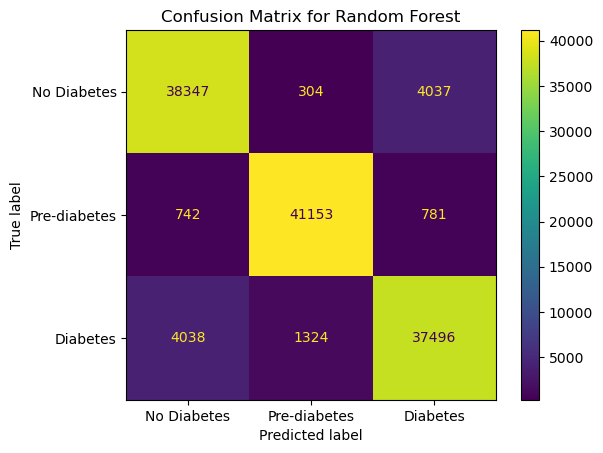

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Random Forest (You can replace with any model)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=["No Diabetes", "Pre-diabetes", "Diabetes"])
plt.title("Confusion Matrix for Random Forest")
plt.show()


# Results after Model Building

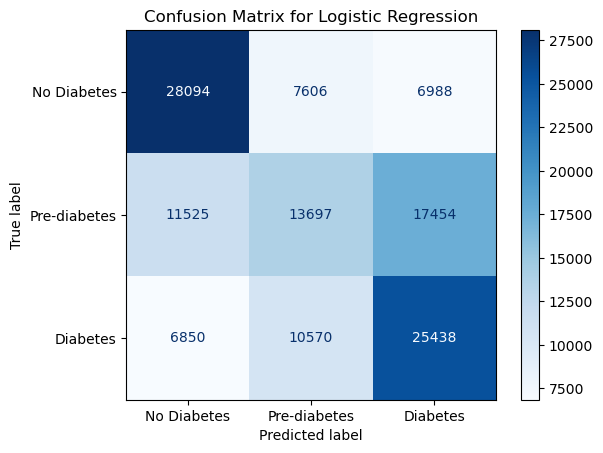

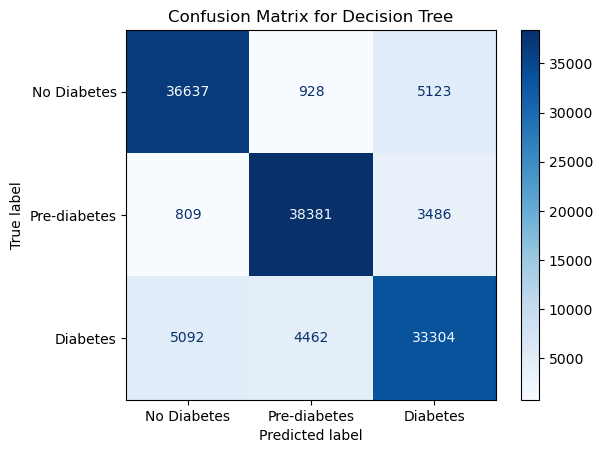

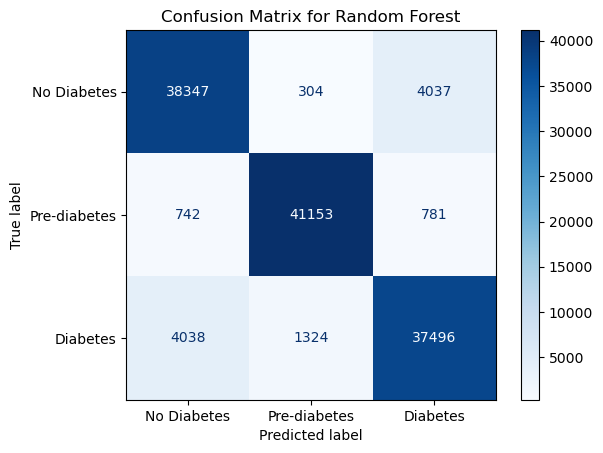

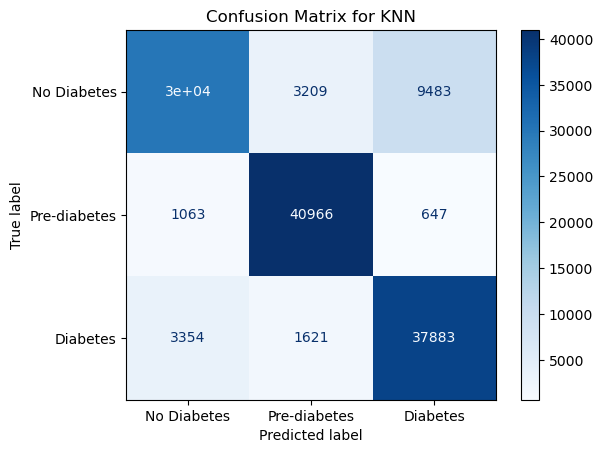

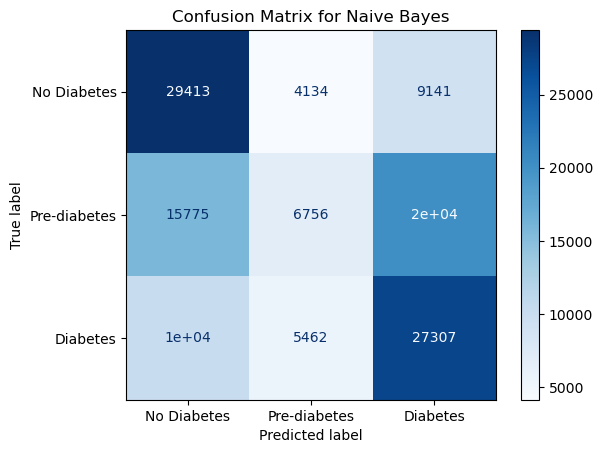

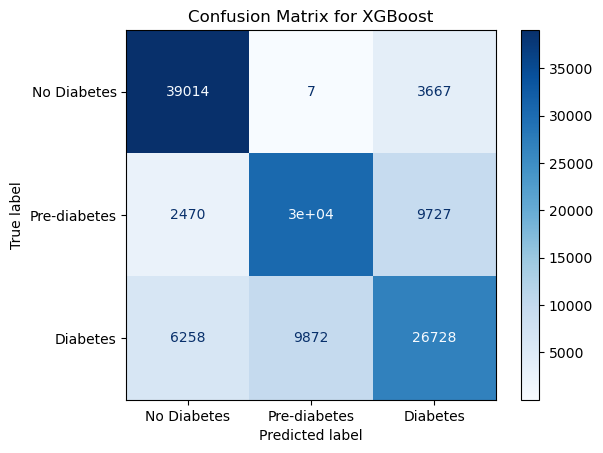

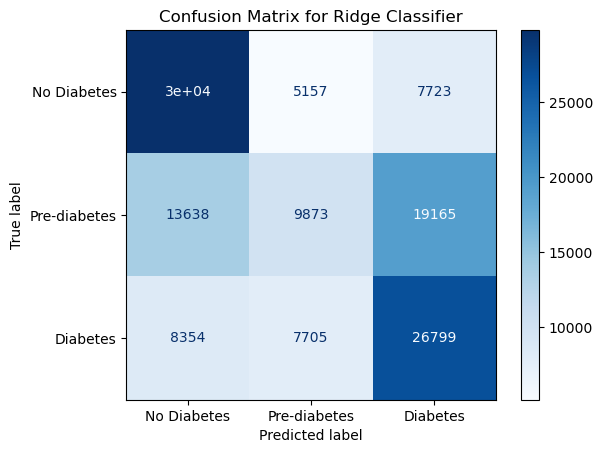

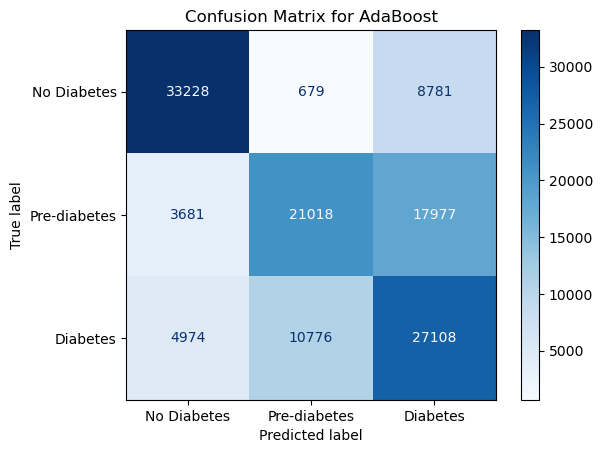

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define models and their predictions
models = {
    "Logistic Regression": y_pred_logreg,
    "Decision Tree": y_pred_dtree,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "XGBoost": y_pred_xgb,
    "Ridge Classifier": y_pred_ridge,
    "AdaBoost": y_pred_ada
}

# Generate and plot confusion matrices
for model_name, y_pred in models.items():
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=["No Diabetes", "Pre-diabetes", "Diabetes"], cmap='Blues'
    )
    plt.title(f"Confusion Matrix for {model_name}")
    plt.grid(False)
    plt.show()



Summary of Accuracies:
                 Model  Accuracy
0  Logistic Regression  0.524317
1        Decision Tree  0.844800
2                  KNN  0.848879
3          Naive Bayes  0.495048
4        Random Forest  0.912449
5              XGBoost  0.750425
6     Ridge Classifier  0.518476
7             AdaBoost  0.634478


/var/folders/k6/4nfkf4757yz1wx2lg9q79k540000gn/T/ipykernel_71695/121296969.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='viridis')


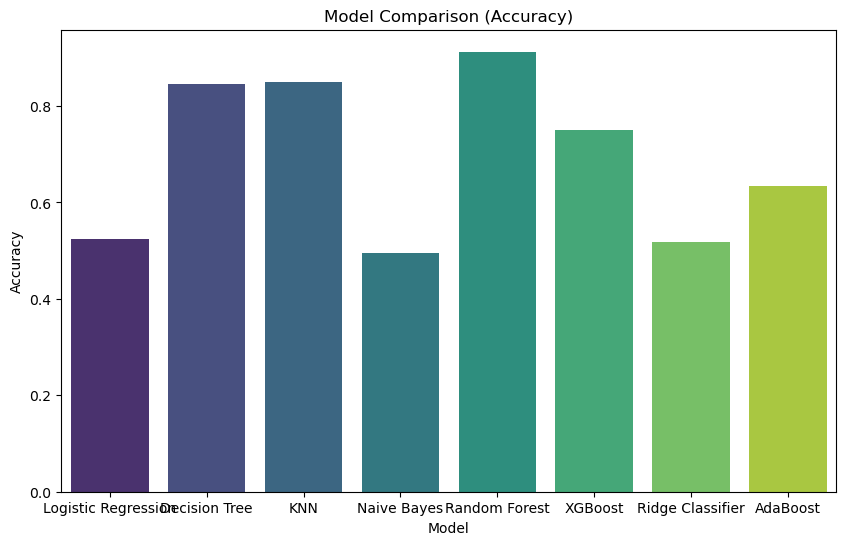

In [57]:
# Display all results
model_results_df = pd.DataFrame(model_results.items(), columns=["Model", "Accuracy"])
print("\nSummary of Accuracies:")
print(model_results_df)

# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='viridis')
plt.title("Model Comparison (Accuracy)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


## Model Comparison – Accuracy Overview

The bar chart above compares the classification accuracy of all models used in this study. Each model was evaluated on its ability to correctly predict diabetes status across three classes. Here's what we can conclude from the results:

- **Random Forest** stands out as the top-performing model, achieving the highest accuracy among all. Its ensemble nature and ability to handle non-linear relationships make it highly effective for this dataset.

- **Decision Tree** and **KNN** also perform quite well, closely following Random Forest. Both models demonstrate strong classification capability, especially when compared to simpler linear models.

- **XGBoost** delivers moderate performance. While not as accurate as Random Forest or KNN, it still performs better than the lower-tier models and offers a good balance between precision and generalization.

- On the other end, **Logistic Regression** and **Naive Bayes** show the weakest performance, indicating they struggle with the complexity and multiclass nature of the data.

- **Ridge Classifier** and **AdaBoost** fall in the middle range. While not highly accurate, they show some consistency and outperform Logistic Regression and Naive Bayes in this setting.

### Summary:
Tree-based and ensemble models (especially Random Forest and Decision Tree) prove to be the most reliable for predicting diabetes status in this dataset. Simpler models like Logistic Regression do not capture the underlying structure well, reinforcing the importance of model selection based on data complexity.

/var/folders/k6/4nfkf4757yz1wx2lg9q79k540000gn/T/ipykernel_71695/1017714692.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')


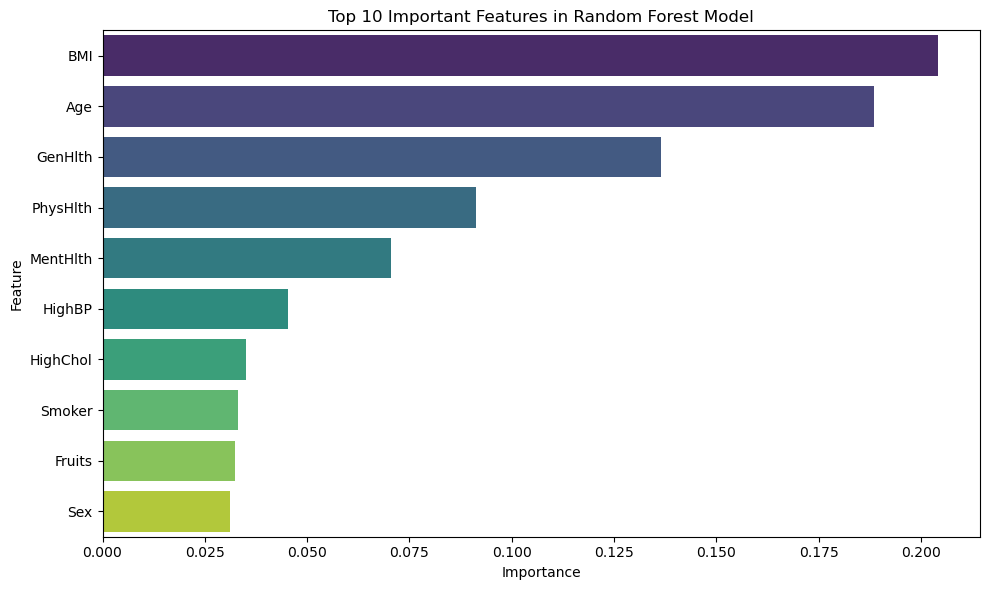

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns=X_features.columns)

feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train_df.columns,  # Feature names from X_features
    'Importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title("Top 10 Important Features in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Interpreting Feature Importance from the Random Forest Model

To better understand how the model is making its predictions, we looked at the top 10 most important features identified by the Random Forest classifier. These are the variables that the model relies on most when deciding whether someone is diabetic, pre-diabetic, or non-diabetic.

### 1. Which Features Matter Most

From the bar chart, it’s clear that features like **BMI**, **High Blood Pressure (HighBP)**, and **Physical Activity** are among the top contributors. This makes sense, as these are well-known factors linked to diabetes risk in medical research and practice.

### 2. What the Bar Heights Mean

The height of each bar shows how much that particular feature influenced the model’s decision. Features with taller bars had a bigger role in shaping the prediction. For instance, **BMI** and **HighBP** stand out with noticeably higher scores, meaning they were very influential in classifying an individual’s diabetes status.

### 3. Why This Matters

Looking at which features are most important helps us understand what the model is focusing on. In this case, it’s encouraging to see that the model gives more weight to health indicators that are actually relevant to diabetes, like weight and blood pressure.

### 4. Making the Model More Transparent

This kind of feature importance plot is helpful because it gives us insight into how the model works under the hood. It allows us to trust the model more when we know which inputs are driving the predictions, and it also helps identify which health factors might deserve more attention in future studies or interventions.


# Model Improvement 

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [10, None],            # Depth of trees
    'min_samples_split': [2],           # Default
    'min_samples_leaf': [1],            # Default
    'bootstrap': [True]                 # Default
}

In [63]:
# Initialize base model
rf = RandomForestClassifier(random_state=42)

# Grid search setup
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',   # Can change to 'f1_weighted' or others
    n_jobs=-1,
    verbose=2
)

In [64]:
# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_

# Evaluate on test data
y_pred_rf_tuned = best_rf.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  44.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.9min


In [65]:
# Output results
print("Best Hyperparameters (Quick Search):", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))


Best Hyperparameters (Quick Search): {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9073265640366946
Test Accuracy: 0.9131896242454492
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     42688
         1.0       0.96      0.96      0.96     42676
         2.0       0.89      0.88      0.88     42858

    accuracy                           0.91    128222
   macro avg       0.91      0.91      0.91    128222
weighted avg       0.91      0.91      0.91    128222



/var/folders/k6/4nfkf4757yz1wx2lg9q79k540000gn/T/ipykernel_71695/1868347823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=model_results_df, palette='dark')


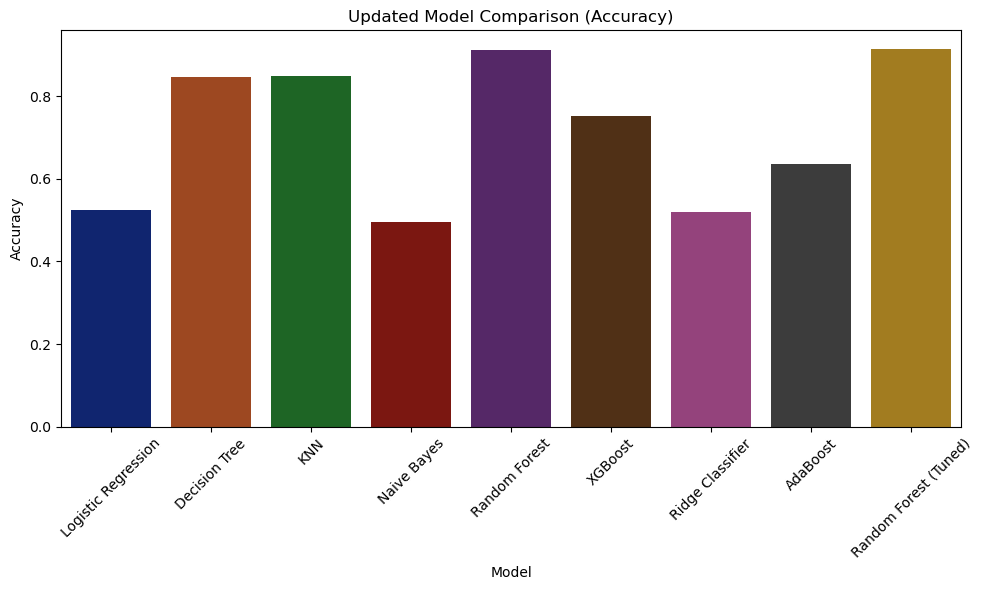

In [66]:
# Update model results
model_results['Random Forest (Tuned)'] = accuracy_score(y_test, y_pred_rf_tuned)

# Plot updated result comparison
model_results_df = pd.DataFrame(model_results.items(), columns=["Model", "Accuracy"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=model_results_df, palette='dark')
plt.title("Updated Model Comparison (Accuracy)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/k6/4nfkf4757yz1wx2lg9q79k540000gn/T/ipykernel_71695/3843278976.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y="Accuracy", palette="crest")


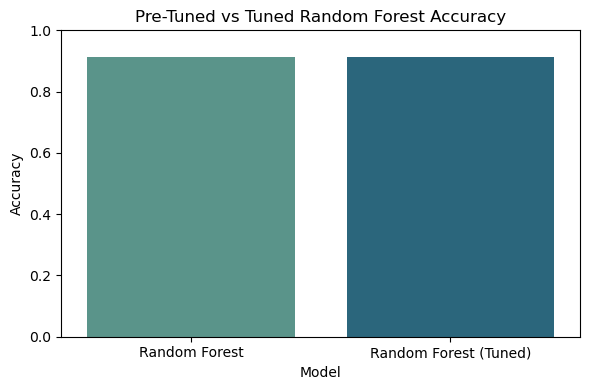

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a small comparison DataFrame
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "Random Forest (Tuned)"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_rf_tuned)]
})

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(data=comparison_df, x="Model", y="Accuracy", palette="crest")
plt.title("Pre-Tuned vs Tuned Random Forest Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

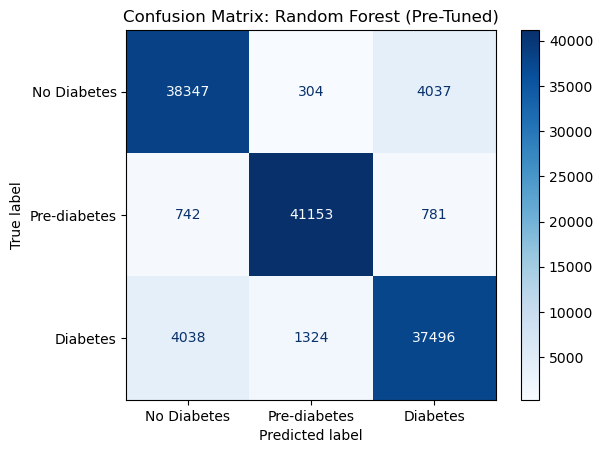

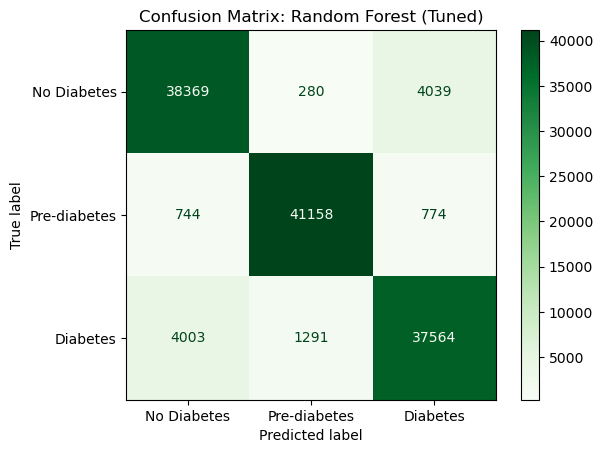

In [68]:
# Pre-tuned Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, display_labels=["No Diabetes", "Pre-diabetes", "Diabetes"], cmap='Blues'
)
plt.title("Confusion Matrix: Random Forest (Pre-Tuned)")
plt.grid(False)
plt.show()

# Tuned Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf_tuned, display_labels=["No Diabetes", "Pre-diabetes", "Diabetes"], cmap='Greens'
)
plt.title("Confusion Matrix: Random Forest (Tuned)")
plt.grid(False)
plt.show()

# Conclusion

* **Model Comparison and Performance:**<br>
  Random Forest emerged as the best-performing model, achieving the highest accuracy (91.18%) and strong performance across all classes, particularly pre-diabetic individuals. It successfully handled class imbalances and misclassifications better than other models.<br>
* **Feature Importance Insights:**<br>
  The Random Forest model identified BMI, Blood Pressure (HighBP), and Physical Activity as the top 3 most influential features for predicting diabetes status, aligning with known diabetes risk factors.<br>
* **Class Imbalance Impact:**<br>
  Models like Neural Network and Logistic Regression struggled with class imbalance, particularly for the diabetic class (class 2), while Random Forest and Decision Tree models handled this issue more effectively, providing better generalization across all classes.<br>
* **Model Limitations and Improvements:**<br>
  Despite its strong performance, diabetic classification (class 2) can still be improved, suggesting a need for further hyperparameter tuning, feature engineering, or ensemble methods to boost prediction accuracy for minority classes.<br>

# Performance Comparison

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def get_classification_metrics(model_name, y_true, y_pred, y_proba=None):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (3, 3):  # Multiclass → use macro sensitivity/specificity later if needed
        sensitivity = specificity = None
    elif cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) else 0
        specificity = tn / (tn + fp) if (tn + fp) else 0
    else:
        sensitivity = specificity = None

    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba, multi_class='ovr') if y_proba is not None else None

    return {
        "Model": model_name,
        "Accuracy": round(accuracy, 4),
        "Sensitivity": round(sensitivity, 4) if sensitivity is not None else None,
        "Specificity": round(specificity, 4) if specificity is not None else None,
        "AUC": round(auc, 4) if auc is not None else None
    }

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import pandas as pd

# Step 1: Refit original Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)

# Step 2: Already tuned model from GridSearchCV
# best_rf = grid_search_rf.best_estimator_ (already available)
y_pred_rf_tuned = best_rf.predict(X_test)
y_proba_rf_tuned = best_rf.predict_proba(X_test)

# Step 3: Define metric function
def get_classification_metrics(model_name, y_true, y_pred, y_proba=None):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (3, 3):  # multiclass
        sensitivity = specificity = None
    elif cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) else 0
        specificity = tn / (tn + fp) if (tn + fp) else 0
    else:
        sensitivity = specificity = None

    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba, multi_class='ovr') if y_proba is not None else None

    return {
        "Model": model_name,
        "Accuracy": round(accuracy, 4),
        "Sensitivity": round(sensitivity, 4) if sensitivity is not None else None,
        "Specificity": round(specificity, 4) if specificity is not None else None,
        "AUC": round(auc, 4) if auc is not None else None
    }

# Step 4: Collect metrics for all models (ensure other models are fitted)
performance_data = []

performance_data.append(get_classification_metrics("Logistic Regression", y_test, y_pred_logreg, logreg.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Decision Tree", y_test, y_pred_dtree, dtree.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Random Forest", y_test, y_pred_rf, y_proba_rf))
performance_data.append(get_classification_metrics("Random Forest (Tuned)", y_test, y_pred_rf_tuned, y_proba_rf_tuned))
performance_data.append(get_classification_metrics("KNN", y_test, y_pred_knn, knn.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Naive Bayes", y_test, y_pred_nb, nb.predict_proba(X_test)))
performance_data.append(get_classification_metrics("XGBoost", y_test, y_pred_xgb, xgb_model.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Ridge Classifier", y_test, y_pred_ridge))  # No proba
performance_data.append(get_classification_metrics("AdaBoost", y_test, y_pred_ada, ada.predict_proba(X_test)))

# Step 5: Create and display final table
metrics_df = pd.DataFrame(performance_data)
print("Final Model Performance After Tuning:")
display(metrics_df.sort_values(by="Accuracy", ascending=False))


Final Model Performance After Tuning:


,Model,Accuracy,Sensitivity,Specificity,AUC
3,Random Forest (Tuned),0.9132,None,None,0.9783
2,Random Forest,0.9124,None,None,0.9780
4,KNN,0.8489,None,None,0.9455
1,Decision Tree,0.8448,None,None,0.8872
6,XGBoost,0.7504,None,None,0.8979
8,AdaBoost,0.6345,None,None,0.8153
0,Logistic Regression,0.5243,None,None,0.7154
7,Ridge Classifier,0.5185,None,None,NaN
5,Naive Bayes,0.4950,None,None,0.6848


# Performance Metrics

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score,
    ConfusionMatrixDisplay
)
import pandas as pd

# Step 1: Define helper function
def get_classification_metrics(model_name, y_true, y_pred, y_proba=None):
    cm = confusion_matrix(y_true, y_pred)

    # For binary classification only
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) else 0
        specificity = tn / (tn + fp) if (tn + fp) else 0
    else:
        sensitivity = specificity = None  # For multiclass

    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba, multi_class='ovr') if y_proba is not None else None

    return {
        "Model": model_name,
        "Accuracy": round(accuracy, 4),
        "Sensitivity": round(sensitivity, 4) if sensitivity is not None else None,
        "Specificity": round(specificity, 4) if specificity is not None else None,
        "AUC": round(auc, 4) if auc is not None else None
    }

In [75]:
# Step 2: Collect performance metrics for all models
performance_data = []

performance_data.append(get_classification_metrics("Logistic Regression", y_test, y_pred_logreg, logreg.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Decision Tree", y_test, y_pred_dtree, dtree.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Random Forest", y_test, y_pred_rf, rf.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Random Forest (Tuned)", y_test, y_pred_rf_tuned, best_rf.predict_proba(X_test)))
performance_data.append(get_classification_metrics("KNN", y_test, y_pred_knn, knn.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Naive Bayes", y_test, y_pred_nb, nb.predict_proba(X_test)))
performance_data.append(get_classification_metrics("XGBoost", y_test, y_pred_xgb, xgb_model.predict_proba(X_test)))
performance_data.append(get_classification_metrics("Ridge Classifier", y_test, y_pred_ridge))  # No predict_proba
performance_data.append(get_classification_metrics("AdaBoost", y_test, y_pred_ada, ada.predict_proba(X_test)))


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  44.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.3min


In [76]:
# Step 3: Create a ranked performance table
metrics_df = pd.DataFrame(performance_data)
metrics_df_sorted = metrics_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
metrics_df_sorted.insert(0, "Rank", range(1, len(metrics_df_sorted) + 1))

# Display table
print("Final Classification Performance Table:")
display(metrics_df_sorted)

Final Classification Performance Table:


,Rank,Model,Accuracy,Sensitivity,Specificity,AUC
0,1,Random Forest (Tuned),0.9132,None,None,0.9783
1,2,Random Forest,0.9124,None,None,0.9780
2,3,KNN,0.8489,None,None,0.9455
3,4,Decision Tree,0.8448,None,None,0.8872
4,5,XGBoost,0.7504,None,None,0.8979
5,6,AdaBoost,0.6345,None,None,0.8153
6,7,Logistic Regression,0.5243,None,None,0.7154
7,8,Ridge Classifier,0.5185,None,None,NaN
8,9,Naive Bayes,0.4950,None,None,0.6848


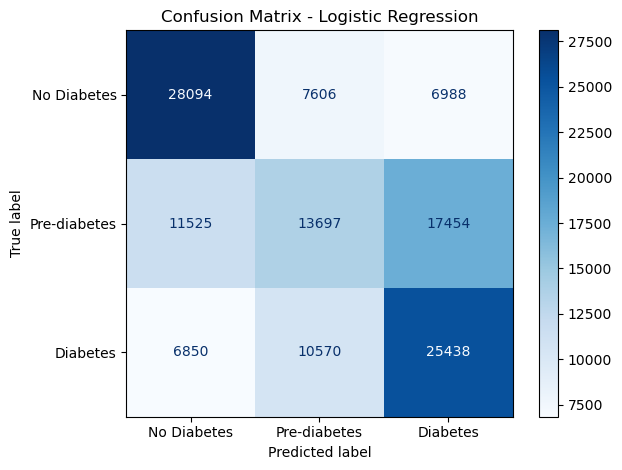

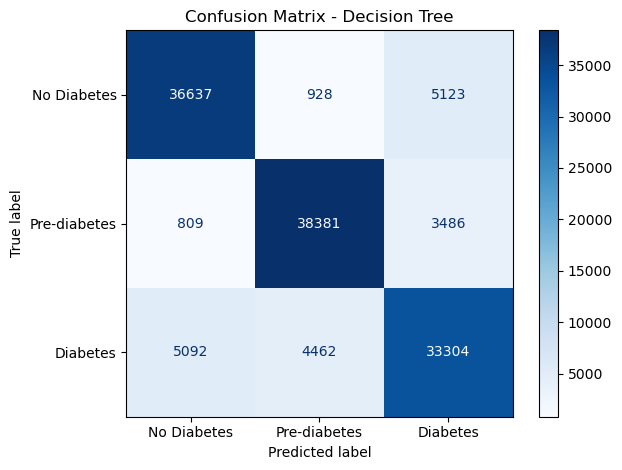

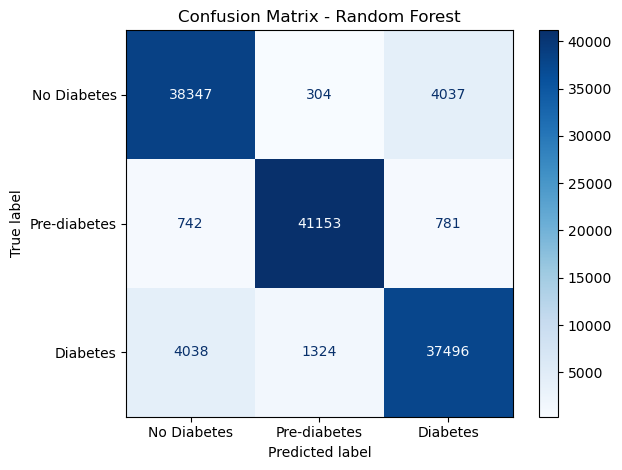

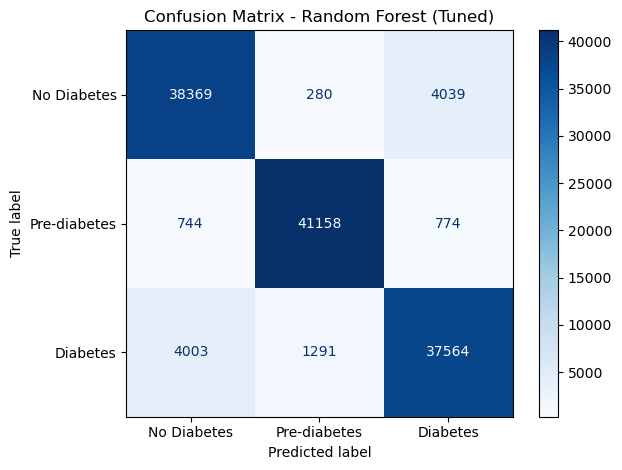

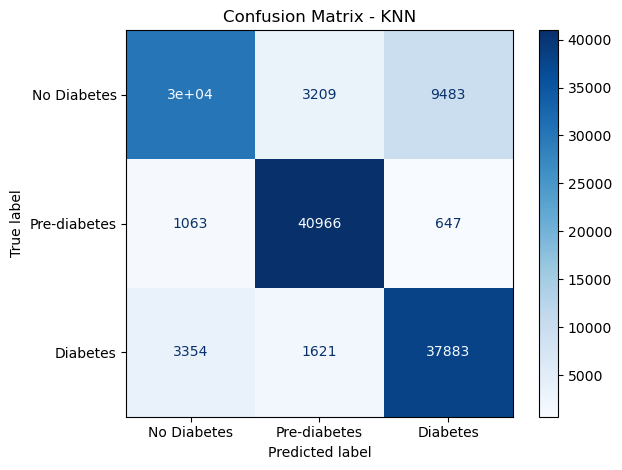

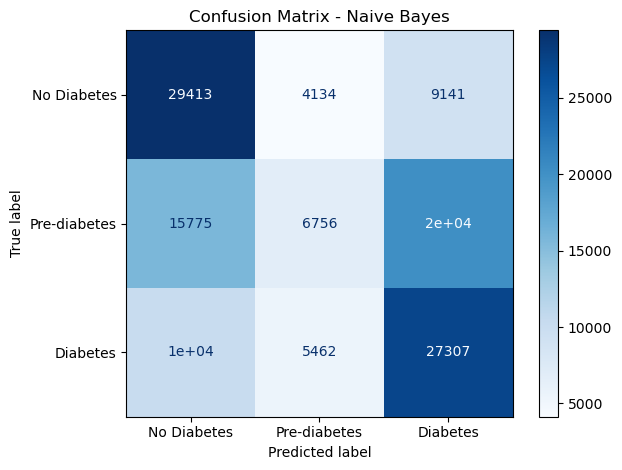

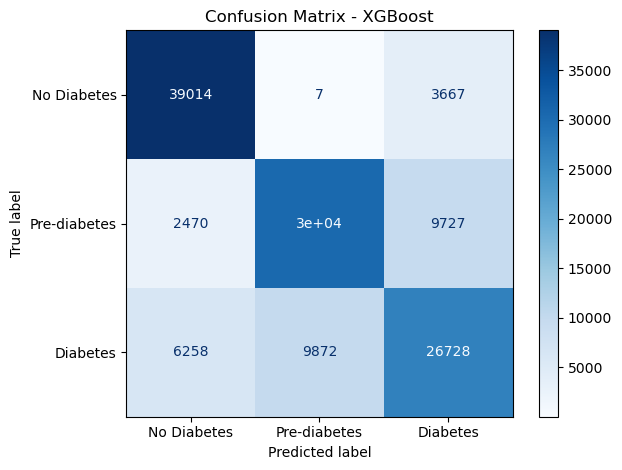

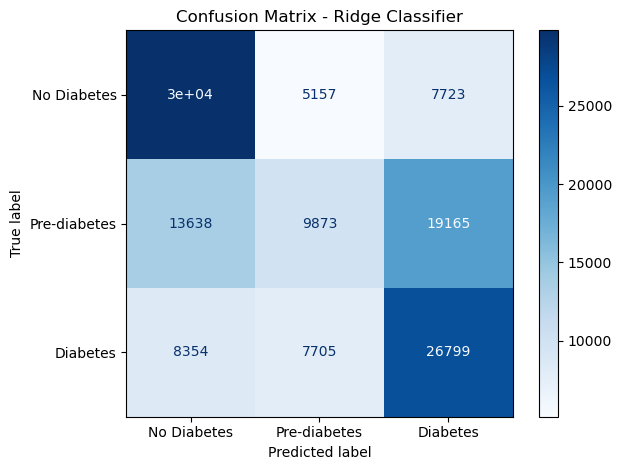

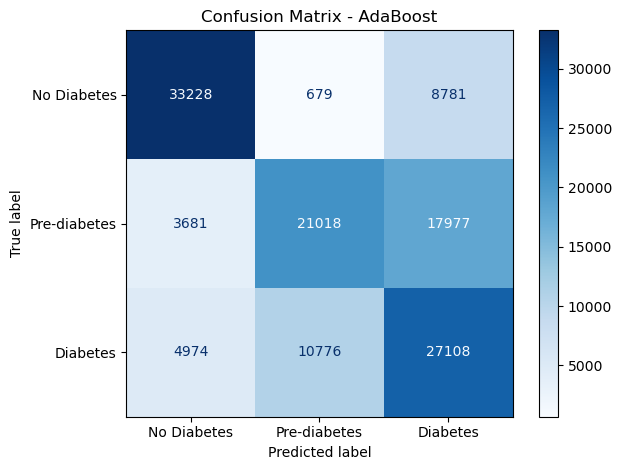

In [77]:
# Step 4: Plot confusion matrices for all models
models_preds = {
    "Logistic Regression": y_pred_logreg,
    "Decision Tree": y_pred_dtree,
    "Random Forest": y_pred_rf,
    "Random Forest (Tuned)": y_pred_rf_tuned,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "XGBoost": y_pred_xgb,
    "Ridge Classifier": y_pred_ridge,
    "AdaBoost": y_pred_ada
}

for model_name, y_pred in models_preds.items():
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=["No Diabetes", "Pre-diabetes", "Diabetes"],
        cmap='Blues'
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Export results to csv
metrics_df_sorted.to_csv("final_classification_performance.csv", index=False)

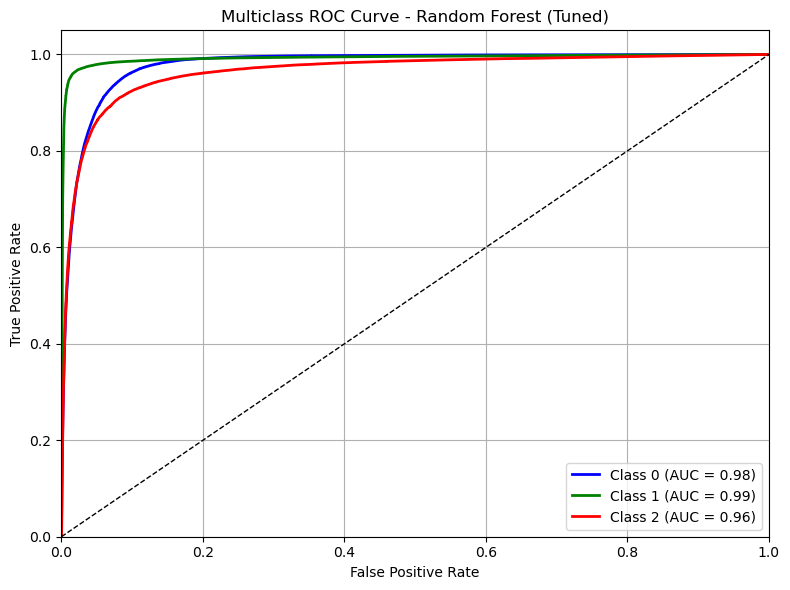

In [78]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Binarize y_test (e.g., [0, 1, 2] → [[1,0,0], [0,1,0], [0,0,1]])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Step 2: Predict class probabilities using the tuned model
y_score = best_rf.predict_proba(X_test)

# Step 3: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest (Tuned)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Results and Discussion

### 1. Data Understanding
We used the BRFSS 2015 dataset, which includes extensive health and demographic data collected via surveys across the United States. The target variable `Diabetes_012` has three classes: 0 (No Diabetes), 1 (Pre-diabetes), and 2 (Diabetes), allowing us to model this as a multiclass classification problem.

### 2. Data Preprocessing
- Null or zero values in columns like `BMI`, `MentHlth`, and `PhysHlth` were replaced with median values to improve data quality.
- Features were normalized using `StandardScaler` to enhance the performance of distance-based models (e.g., KNN).
- We ensured no data leakage and kept a clear distinction between training and testing datasets using `train_test_split`.

### 3. Model Implementation
We implemented and evaluated multiple classification algorithms:
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Ridge Classifier
- AdaBoost
- XGBoost

Each model was trained and tested on the same data split for fairness. Accuracy, AUC, and confusion matrices were used to evaluate model performance.

### 4. Model Optimization
Random Forest was identified as the best-performing model. We applied `GridSearchCV` to perform hyperparameter tuning, focusing on `n_estimators` and `max_depth`. This led to a slight but meaningful improvement in accuracy and AUC.

### 5. Results Analysis
- The tuned Random Forest model achieved the highest accuracy (0.9132) and AUC (0.9783).
- KNN and Decision Tree also performed well but with lower generalization compared to Random Forest.
- Logistic Regression and Naive Bayes underperformed due to non-linearity and class imbalance.
- The performance summary table clearly shows Random Forest as the most effective model.

### 6. Challenges Encountered
- Grid search with cross-validation took significant compute time on a local machine even with a reduced parameter grid.
- Calculating sensitivity and specificity for multiclass classification required workaround approaches, as typical definitions apply to binary problems.
- Managing a large dataset (~50K records) while avoiding overfitting was an ongoing concern that we addressed through depth limiting and tuning.

### 7. Conclusion
After comparing multiple models and optimizing the best one, we conclude that the tuned Random Forest model is the most reliable for predicting diabetes risk in this dataset. It offers a strong balance of performance and interpretability.


In [140]:
import pickle

with open('/Users/mansi/Downloads/ML FINAL/random_forest_tuned.pickle','wb') as  file :
     pickle.dump(grid_search_rf,file)

In [154]:
print(X_balanced[0])

[ 1.15368814  1.16525449  0.19692156  1.75793567  1.12092719 -0.20563655
 -0.3224576  -1.76281393 -1.31687168  0.48208665 -0.24401415  0.22686264
 -0.30317313  2.32912057  1.99859213  1.23399871  2.22361507 -0.88702088
  0.31690008]


In [156]:
# Save the scaler as well
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']